Ok this is serious. I am going to try to combine three (or maybe just two) tables to create a property tax paid map.
I will use the king county shapefile, the king county parcel data - https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::parcels-for-king-county-with-address-with-property-information-parcel-address-area/explore 

and the king county real property tax receivables data - https://data.kingcounty.gov/Property-Assessments/Real-Property-Tax-Receivables/dkna-i698



In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt


pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

parcel_data_frame = gpd.read_file("C:/Users/aaron/Code/Data/Parcels_for_King_County_with_Address_with_Property_Information___parcel_address_area.zip")
tax_data_frame = pd.read_csv("C:/Users/aaron/Code/Data/Real_Property_Tax_Receivables.csv")

parcel_data_frame.head()

OBJECTID   MAJOR MINOR         PIN COMMENTS SITETYPE  \
0         1  990600  0100  9906000100     None       R1   
1         2  990600  0090  9906000090     None       R1   
2         3  990600  0080  9906000080     None       R1   
3         4  990600  0065  9906000065     None       R1   
4         5  990600  0060  9906000060     None       R1   

                                   SITEID ADDR_HN ADDR_PD ADDR_PT ADDR_SN  \
0  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
1  {C02EB04E-58D3-4C9B-83CE-D4BBDDF8A72C}     115      NW    None    41ST   
2  {7E515CEF-6A98-42A8-AE42-4A0382F3D089}     111      NW    None    41ST   
3  {46A6992D-BFC2-4469-8EB8-3D51EE025941}    4015    None    None     1ST   
4  {8ABFC012-D27B-468E-8C10-6587980B7DA8}    4017    None    None     1ST   

  ADDR_ST ADDR_SD  ADDR_NUM        ADDR_FULL    FULLNAME   ZIP5 PLUS4  \
0      ST    None     119.0   119 NW 41ST ST  NW 41ST ST  98107  4928   
1      ST    None     115.0   115 NW 41ST ST  NW 41ST ST  98107  4928   
2      ST    None     111.0   111 NW 41ST ST  NW 41ST ST  98107  4928   
3     AVE      NW    4015.0  4015 1ST AVE NW  1ST AVE NW  98107  4908   
4     AVE      NW    4017.0  4017 1ST AVE NW  1ST AVE NW  98107  4908   

   CTYNAME POSTALCTYN        LAT         LON       POINT_X        POINT_Y  \
0  Seattle    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   
1  Seattle    SEATTLE  47.656112 -122.357895  1.264713e+06  243051.033052   
2  Seattle    SEATTLE  47.656112 -122.357733  1.264753e+06  243050.356872   
3  Seattle    SEATTLE  47.656014 -122.357477  1.264816e+06  243013.160096   
4  Seattle    SEATTLE  47.656116 -122.357474  1.264817e+06  243050.573079   

  COUNTY KROLL KCTP_CITY KCTP_STATE       PLSS PROP_NAME       PLAT_NAME  \
0   KING    21   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD   
1   KING    21   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD   
2   KING    21   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD   
3   KING    21   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD   
4   KING    21   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD   

  PLAT_LOT PLAT_BLOCK  LOTSQFT LEVYCODE LEVY_JURIS NEW_CONSTR TAXVAL_RSN  \
0        4          2   4400.0     0010    SEATTLE          N       None   
1      3-4          2   4404.0     0010    SEATTLE          N       None   
2      2-3          2   4400.0     0010    SEATTLE          N       None   
3      1-2          2   3290.0     0010    SEATTLE          N       None   
4      1-2          2   6234.0     0010    SEATTLE          N       None   

   APPRLNDVAL  APPR_IMPR  TAX_LNDVAL  TAX_IMPR     ACCNT_NUM  KCTP_TAXYR  \
0    659000.0   244000.0    659000.0  244000.0  990600010005      2023.0   
1    698000.0   207000.0    698000.0  207000.0  990600009007      2023.0   
2    698000.0   255000.0    698000.0  255000.0  990600008009      2023.0   
3    583000.0   190000.0    583000.0  190000.0  990600006508      2023.0   
4    776000.0    96000.0    776000.0   96000.0  990600006003      2023.0   

  UNIT_NUM BLDG_NUM CONDOSITUS QTS SEC TWP RNG  PRIMARY_AD ANNEXING_C  \
0     None     None       None  NE  13  25   3           1       None   
1     None     None       None  NE  13  25   3           1       None   
2     None     None       None  NE  13  25   3           1       None   
3     None     None       None  NE  13  25   3           1       None   
4     None     None       None  NE  13  25   3           1       None   

  PAAUNIQUEN PROPTYPE ALIAS1 ALIAS2 KCA_ZONING  KCA_ACRES  \
0       None        R   None   None        NR3   0.101010   
1       None        R   None   None        NR3   0.101102   
2       None        R   None   None        NR3   0.101010   
3       None        R   None   None        NR3   0.075528   
4       None        R   None   None        NR3   0.143113   

                                           LEGALDESC  PREUSE_COD  \
0          ZWICKS 1ST ADD             

In [2]:
tax_data_frame.head()

Account_Number Account_Status  Levy_Code  Omit_Levy_Code Tax_Status  \
0    918570047004              A       9446               0          T   
1    667500045006              A       9430               0          T   
2    152104918106              A       9361               0          T   
3    549146041005              A       9454               0          T   
4    102506916802              A       9430               0          T   

  Receivable_Type  Bill_Year  Omit_Year  Land_Value  Imps_Value  \
0               U       2023          0           0           0   
1               V       2023          0           0           0   
2               E       2023          0           0           0   
3               U       2023          0           0           0   
4               V       2023          0           0           0   

   Forest_Patrol_Acres  Drainage_District  Drainage_Benefit  Drainage_Acres  \
0                    0                  0                 0               0   
1                    0                  0                 0               0   
2                    0                  0                 0               0   
3                    0                  0                 0               0   
4                    0                  0                 0               0   

   Billed_Amount  Paid_Amount  Bill_Requestor_Id Senior_Citizen_Flag  \
0         172051       172051                  0                 NaN   
1           1247         1247                  0                 NaN   
2          41725        41725                  0                 NaN   
3          20611        20611               5640                 NaN   
4           1247         1247                  0                 NaN   

  New_Construction_Flag  Change_Reason  
0                   NaN             47  
1                   NaN             59  
2                   NaN             47  
3                   NaN             47  
4                   NaN             47

In [3]:
parcel_data_frame['ACCNT_NUM'] = parcel_data_frame['ACCNT_NUM'].astype(float)

In [4]:
parcel_data_frame.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 631042 entries, 0 to 631041
Data columns (total 65 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    631042 non-null  int64   
 1   MAJOR       631042 non-null  object  
 2   MINOR       631042 non-null  object  
 3   PIN         631042 non-null  object  
 4   COMMENTS    101916 non-null  object  
 5   SITETYPE    570111 non-null  object  
 6   SITEID      570111 non-null  object  
 7   ADDR_HN     570111 non-null  object  
 8   ADDR_PD     225123 non-null  object  
 9   ADDR_PT     1 non-null       object  
 10  ADDR_SN     570111 non-null  object  
 11  ADDR_ST     569640 non-null  object  
 12  ADDR_SD     326648 non-null  object  
 13  ADDR_NUM    570111 non-null  float64 
 14  ADDR_FULL   570111 non-null  object  
 15  FULLNAME    570111 non-null  object  
 16  ZIP5        630114 non-null  object  
 17  PLUS4       482491 non-null  object  
 18  CTYNAME     5255

In [5]:
tax_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890808 entries, 0 to 2890807
Data columns (total 20 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Account_Number         int64 
 1   Account_Status         object
 2   Levy_Code              int64 
 3   Omit_Levy_Code         int64 
 4   Tax_Status             object
 5   Receivable_Type        object
 6   Bill_Year              int64 
 7   Omit_Year              int64 
 8   Land_Value             int64 
 9   Imps_Value             int64 
 10  Forest_Patrol_Acres    int64 
 11  Drainage_District      int64 
 12  Drainage_Benefit       int64 
 13  Drainage_Acres         int64 
 14  Billed_Amount          int64 
 15  Paid_Amount            int64 
 16  Bill_Requestor_Id      int64 
 17  Senior_Citizen_Flag    object
 18  New_Construction_Flag  object
 19  Change_Reason          int64 
dtypes: int64(15), object(5)
memory usage: 441.1+ MB


In [6]:
#### Gonna attempt to merge the data frames using the account number field

data_frame = pd.merge(parcel_data_frame, tax_data_frame, how = 'inner', left_on = 'ACCNT_NUM', right_on = 'Account_Number')

In [7]:
print (data_frame.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2485363 entries, 0 to 2485362
Data columns (total 85 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   OBJECTID               int64   
 1   MAJOR                  object  
 2   MINOR                  object  
 3   PIN                    object  
 4   COMMENTS               object  
 5   SITETYPE               object  
 6   SITEID                 object  
 7   ADDR_HN                object  
 8   ADDR_PD                object  
 9   ADDR_PT                object  
 10  ADDR_SN                object  
 11  ADDR_ST                object  
 12  ADDR_SD                object  
 13  ADDR_NUM               float64 
 14  ADDR_FULL              object  
 15  FULLNAME               object  
 16  ZIP5                   object  
 17  PLUS4                  object  
 18  CTYNAME                object  
 19  POSTALCTYN             object  
 20  LAT                    float64 
 21  LON                    

In [8]:
data_frame.head()

OBJECTID   MAJOR MINOR         PIN COMMENTS SITETYPE  \
0         1  990600  0100  9906000100     None       R1   
1         1  990600  0100  9906000100     None       R1   
2         1  990600  0100  9906000100     None       R1   
3         1  990600  0100  9906000100     None       R1   
4         2  990600  0090  9906000090     None       R1   

                                   SITEID ADDR_HN ADDR_PD ADDR_PT ADDR_SN  \
0  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
1  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
2  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
3  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
4  {C02EB04E-58D3-4C9B-83CE-D4BBDDF8A72C}     115      NW    None    41ST   

  ADDR_ST ADDR_SD  ADDR_NUM       ADDR_FULL    FULLNAME   ZIP5 PLUS4  CTYNAME  \
0      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
1      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
2      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
3      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
4      ST    None     115.0  115 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   

  POSTALCTYN        LAT         LON       POINT_X        POINT_Y COUNTY KROLL  \
0    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
1    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
2    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
3    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
4    SEATTLE  47.656112 -122.357895  1.264713e+06  243051.033052   KING    21   

  KCTP_CITY KCTP_STATE       PLSS PROP_NAME       PLAT_NAME PLAT_LOT  \
0   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
1   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
2   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
3   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
4   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD      3-4   

  PLAT_BLOCK  LOTSQFT LEVYCODE LEVY_JURIS NEW_CONSTR TAXVAL_RSN  APPRLNDVAL  \
0          2   4400.0     0010    SEATTLE          N       None    659000.0   
1          2   4400.0     0010    SEATTLE          N       None    659000.0   
2          2   4400.0     0010    SEATTLE          N       None    659000.0   
3          2   4400.0     0010    SEATTLE          N       None    659000.0   
4          2   4404.0     0010    SEATTLE          N       None    698000.0   

   APPR_IMPR  TAX_LNDVAL  TAX_IMPR     ACCNT_NUM  KCTP_TAXYR UNIT_NUM  \
0   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
1   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
2   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
3   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
4   207000.0    698000.0  207000.0  9.906000e+11      2023.0     None   

  BLDG_NUM CONDOSITUS QTS SEC TWP RNG  PRIMARY_AD ANNEXING_C PAAUNIQUEN  \
0     None       None  NE  13  25   3           1       None       None   
1     None       None  NE  13  25   3           1       None       None   
2     None       None  NE  13  25   3           1       None       None   
3     None       None  NE  13  25   3           1       None       None   
4     None       None  NE  13  25   3           1       None       None   

  PROPTYPE ALIAS1 ALIAS2 KCA_ZONING  KCA_ACRES  \
0        R   None   None        NR3   0.101010   
1        R   None   None        NR3   0.101010   
2        R   None   None        NR3   0.101010   
3        R   None   None        NR3   0.101010   
4        R   None   None        NR3   0.101102   

                                           LEGALDESC  PREUSE_COD  \
0          ZWICKS 1ST ADD                   

In [9]:
seattle_frame = data_frame[data_frame['CTYNAME'].isin(['SEATTLE', 'Seattle'])]

In [10]:
seattle_frame.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 750540 entries, 0 to 2484423
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   OBJECTID               750540 non-null  int64   
 1   MAJOR                  750540 non-null  object  
 2   MINOR                  750540 non-null  object  
 3   PIN                    750540 non-null  object  
 4   COMMENTS               110606 non-null  object  
 5   SITETYPE               715615 non-null  object  
 6   SITEID                 715615 non-null  object  
 7   ADDR_HN                715615 non-null  object  
 8   ADDR_PD                227601 non-null  object  
 9   ADDR_PT                3 non-null       object  
 10  ADDR_SN                715615 non-null  object  
 11  ADDR_ST                714328 non-null  object  
 12  ADDR_SD                458912 non-null  object  
 13  ADDR_NUM               715615 non-null  float64 
 14  ADDR_FULL  

In [169]:
#seattle_frame['Paid_Amount'].max()

seattle_frame.loc[seattle_frame['Paid_Amount'] == 622098534]

OBJECTID   MAJOR MINOR         PIN COMMENTS SITETYPE  \
2229469    566913  094200  0640  0942000640     None       C1   

                                         SITEID ADDR_HN ADDR_PD ADDR_PT  \
2229469  {57D73BAC-21CC-4BDB-8C25-C934FCA65FC5}     411    None    None   

          ADDR_SN ADDR_ST ADDR_SD  ADDR_NUM        ADDR_FULL     FULLNAME  \
2229469  COLUMBIA      ST    None       411  411 COLUMBIA ST  COLUMBIA ST   

          ZIP5 PLUS4  CTYNAME POSTALCTYN  LAT  LON  POINT_X  POINT_Y COUNTY  \
2229469  98104  1654  Seattle    SEATTLE   48 -122  1271045   224125   KING   

        KROLL    KCTP_CITY KCTP_STATE       PLSS  \
2229469    40  LOS ANGELES         CA  SW32-25-4   

                                        PROP_NAME       PLAT_NAME  PLAT_LOT  \
2229469  COLUMBIA CENTER ( former B. of A. Tower)  BORENS C D ADD  1 THRU 8   

        PLAT_BLOCK  LOTSQFT LEVYCODE LEVY_JURIS NEW_CONSTR TAXVAL_RSN  \
2229469         28    59266     0011    SEATTLE          N       None   

         APPRLNDVAL  APPR_IMPR  TAX_LNDVAL  TAX_IMPR   ACCNT_NUM  KCTP_TAXYR  \
2229469    91862300  674372700    91862300 674372700 94200064007        2023   

        UNIT_NUM BLDG_NUM CONDOSITUS QTS SEC TWP RNG  PRIMARY_AD ANNEXING_C  \
2229469     None     None       None  SW  32  25   4           1       None   

        PAAUNIQUEN PROPTYPE ALIAS1 ALIAS2    KCA_ZONING  KCA_ACRES  \
2229469       None        C   None   None  DOC1 U/450/U          1   

                                                 LEGALDESC  PREUSE_COD  \
2229469  BORENS C D ADD ALL BLK 28 C.D. BOREN'S ADDITIO...         106   

              PREUSE_DES  Shape_Leng  Shape_Area  \
2229469  Office Building         974       59279   

                                                  geometry  Account_Number  \
2229469  POLYGON ((-122.33041 47.60486, -122.33028 47.6...     94200064007   

        Account_Status  Levy_Code  Omit_Levy_Code Tax_Status Receivable_Type  \
2229469              A         11               0          T               R   

         Bill_Year  Omit_Year  Land_Value  Imps_Value  Forest_Patrol_Acres  \
2229469       2023          0    91862300   674372700                    0   

         Drainage_District  Drainage_Benefit  Drainage_Acres  Billed_Amount  \
2229469                  0                 0               0      622098534   

         Paid_Amount  Bill_Requestor_Id Senior_Citizen_Flag  \
2229469    622098534                  0                 NaN   

        New_Construction_Flag  Change_Reason Land_Use_Family  \
2229469                   NaN             59          Office   

         Tax_Income_Per_SQFT  
2229469                10497

Text(0.5, 1.0, 'Property Tax paid by Parcel, Log scale')

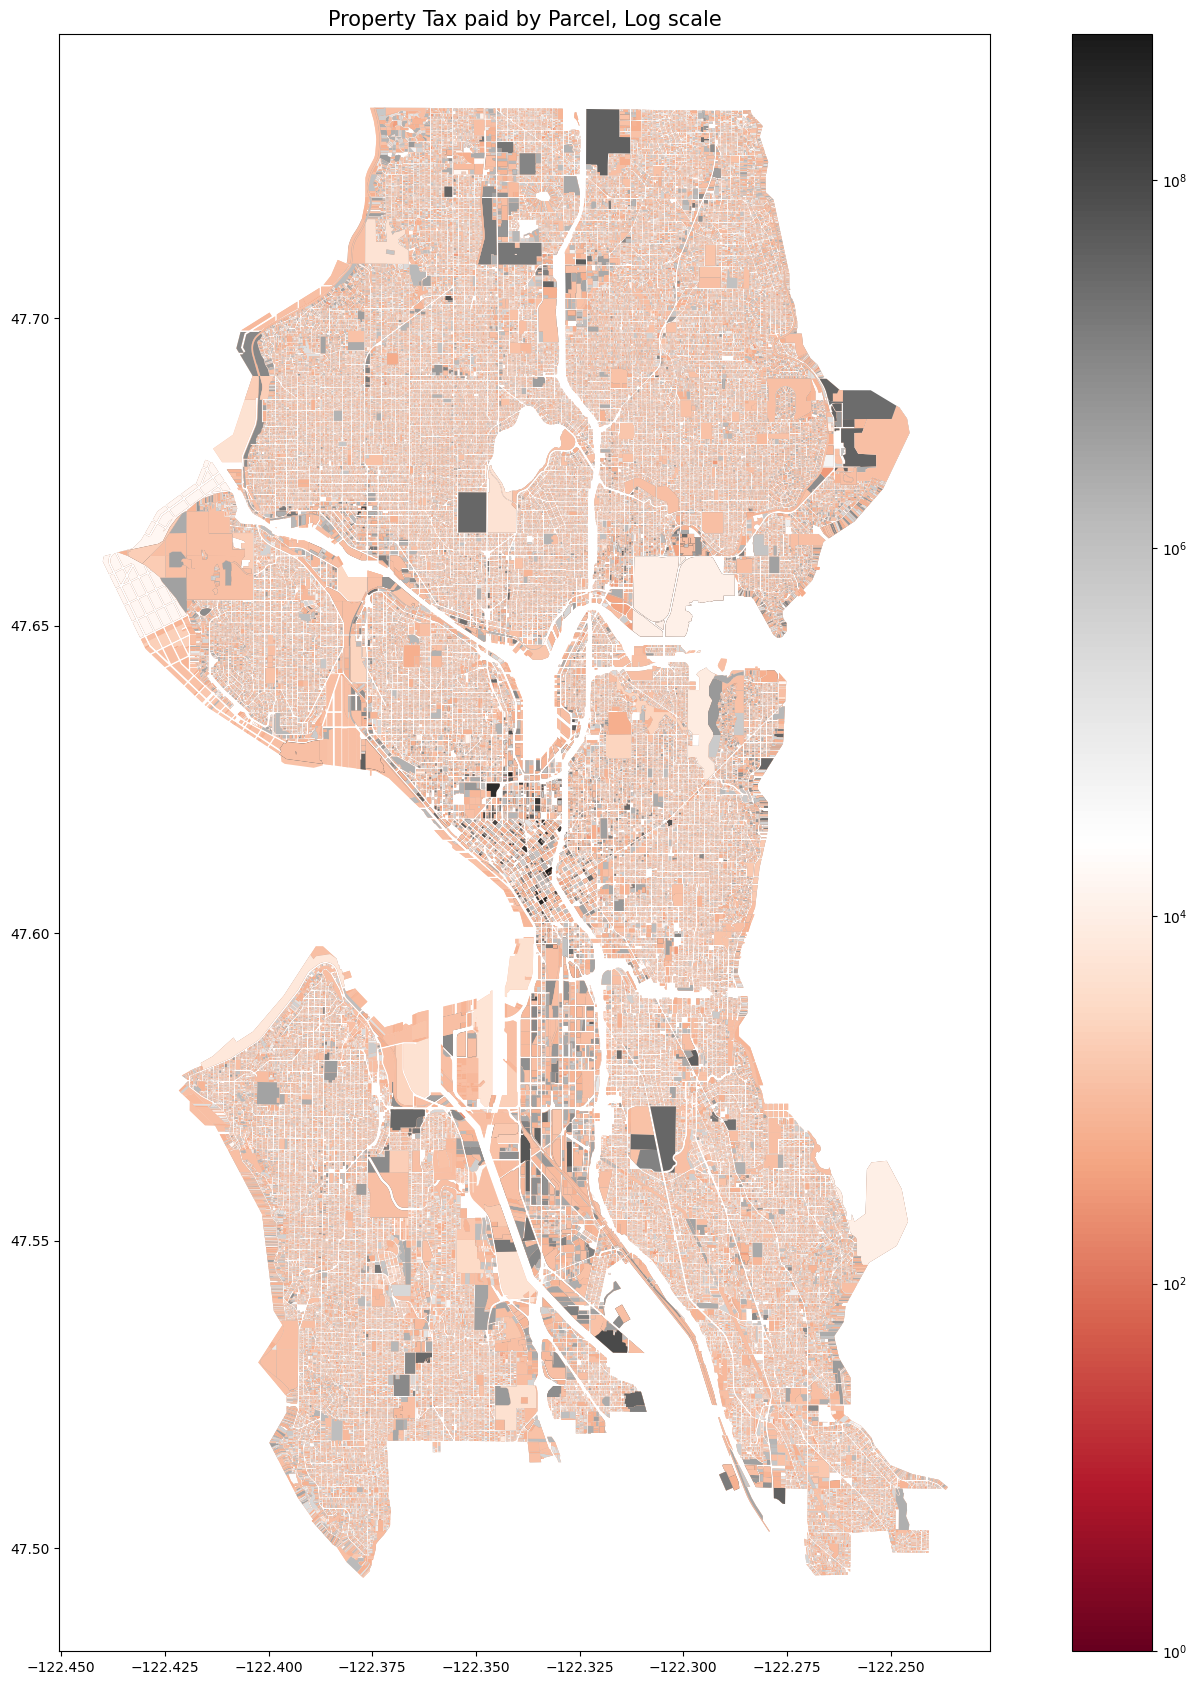

In [133]:
#seattle_frame.plot(column = 'Paid_Amount', figsize = (20,20), legend = True, logx = True)

min = seattle_frame['Paid_Amount'].min().astype(float)
max = seattle_frame['Paid_Amount'].max().astype(float)


fig, ax = plt.pyplot.subplots(figsize  = (21, 21))

seattle_frame.plot(column = 'Paid_Amount',
                    cmap = 'RdGy',
                    legend = True,
                    norm=plt.colors.LogNorm(vmin = 1.0, vmax = max),
                    ax = ax)

ax.set_title("Property Tax paid by Parcel, Log scale", fontsize=15)


#seattle_frame.plot(column = 'Paid_Amount', figsize = (20,20), legend = True, norm=plt.colors.LogNorm(vmin = 1.0, vmax = max), cmap = 'RdGy')



In [12]:
#seattle_frame.plot(column = 'PREUSE_DES', figsize = (20,20), legend = True)

In [13]:
#parcel_data_frame['CTYNAME'].value_counts()

In [14]:
#seattle_frame.plot(column = 'KCA_ZONING', figsize = (20,20), legend = True)

In [15]:
land_use_map = {
'Single Family(Res Use/Zone)':'Single Family',
'Townhouse Plat':'Residential (Other)',
'Vacant(Single-family)':'Vacant (Comm/Res)',
'Apartment':'Apartment/Condo',
'Duplex':'Residential (Other)',
'Condominium(Residential)':'Apartment/Condo',
'Office Building':'Office',
'Triplex':'Residential (Other)',
'Single Family(C/I Zone)':'Single Family',
'Retail Store':'Retail',
'Apartment(Mixed Use)':'Apartment/Condo',
'Warehouse':'Industrial',
'4-Plex':'Residential (Other)',
'Vacant(Multi-family)':'Vacant (Comm/Res)',
'Vacant(Commercial)':'Vacant (Comm/Res)',
'Parking(Assoc)':'Parking',
'Church/Welfare/Relig Srvc':'Cultural',
'Vacant(Industrial)':'Industrial',
'Restaurant/Lounge':'Food Service',
'Service Building':'Industrial',
'Industrial(Gen Purpose)':'Industrial',
'Park, Public(Zoo/Arbor)':'Outdoor Recreation',
'Right of Way/Utility, Road':'Transportation',
'Parking(Commercial Lot)':'Parking',
'Industrial(Lignt)':'Industrial',
'Condominium(Mixed Use)':'Apartment/Condo',
'Utility, Public':'Public Service',
'Medical/Dental Office':'Office',
'Rooming House':'Residential (Other)',
'School(Public)':'School',
'Single Family(C/I Use)':'Single Family',
'Marina':'Retail',
'Governmental Service':'Public Service',
'Retail(Line/Strip)':'Retail',
'Hotel/Motel':'Retail',
'School(Private)':'School',
'Apartment(Subsidized)':'Apartment/Condo',
'Restaurant(Fast Food)':'Food Service',
'Conv Store with Gas':'Retail',
'Bank':'Retail',
'Terminal(Marine)':'Transportation',
'Retirement Facility':'Residential (Other)',
'Tideland, 1st Class':'Outdoor Recreation',
'Group Home':'Residential (Other)',
'Industrial(Heavy)':'Industrial',
'Terminal(Rail)':'Transportation',
'Parking(Garage)':'Parking',
'Houseboat':'Residential (Other)',
'Tavern/Lounge':'Food Service',
'Auto Showroom and Lot':'Retail',
'Grocery Store':'Retail',
'Fraternity/Sorority House':'Residential (Other)',
'Daycare Center':'Public Service',
'Club':'Retail',
'Mini Warehouse':'Industrial',
'Sport Facility':'Outdoor Recreation',
'Apartment(Co-op)':'Residential (Other)',
'Art Gallery/Museum/Soc Srvc':'Cultural',
'Residence Hall/Dorm':'Residential (Other)',
'Shell Structure':'Industrial',
'Terminal(Marine/Comm Fish)':'Industrial',
'Conv Store without Gas':'Retail',
'Vet/Animal Control Srvc':'Retail',
'Historic Prop(Office)':'Cultural',
'Terminal(Auto/Bus/Other)':'Transportation',
'Service Station':'Public Service',
'Mortuary/Cemetery/Crematory':'Public Service',
'Hospital':'Public Service',
'Auditorium//Assembly':'Cultural',
'Shopping Ctr(Nghbrhood)':'Retail',
'Health Club':'Public Service',
'Industrial Park':'Industrial',
'Nursing Home':'Residential (Other)',
'Golf Course':'Outdoor Recreation',
'Retail(Discount)':'Retail',
'Utility, Private(Radio/T.V.)':'Retail',
'Easement':'Residential (Other)',
'Condominium(Office)':'Office',
'Post Office/Post Service':'Public Service',
'Historic Prop(Residence)':'Residential (Other)',
'Car Wash':'Retail',
'Retail(Big Box)':'Retail',
'Movie Theater':'Cultural',
'Historic Prop(Retail)':'Retail',
'Park, Private(Amuse Ctr)':'Outdoor Recreation',
'Open Space(Curr Use-RCW 84.34)':'Outdoor Recreation',
'Shopping Ctr(Community)':'Retail',
'Shopping Ctr(Maj Retail)':'Retail',
'Tideland, 2nd Class':'Outdoor Recreation',
'Mini Lube':'Retail',
'Historic Prop(Misc)':'Cultural',
'Mobile Home':'Residential (Other)',
'Air Terminal and Hangers':'Industrial',
'Greenhse/Nrsry/Hort Srvc':'Retail',
'Rehabilitation Center':'Retail',
'Water Body, Fresh':'Outdoor Recreation',
'Historic Prop(Rec/Entertain)':'Cultural',
'High Tech/High Flex':'Cultural',
'Bowling Alley':'Cultural',
'Mobile Home Park':'Residential (Other)',
'Bed & Breakfast':'Retail',
'River/Creek/Stream':'Outdoor Recreation',
'Historic Prop(Vacant Land)':'Outdoor Recreation',
'Open Space(Agric-RCW 84.34)':'Outdoor Recreation',
'Reserve/Wilderness Area':'Outdoor Recreation',
'Open Space Tmbr Land/Greenbelt':'Outdoor Recreation',
'Historic Prop(Loft/Warehse)':'Cultural',
'Gas Station':'Retail',
'Historic Prop(Park/Billbrd)':'Cultural',
'Driving Range':'Cultural',
'Skating Rink(Ice/Rol':'Cultural',
'Shopping Ctr(Regional)':'Retail',
'Office Park':'Office',
'Transferable Dev Rights':'Retail',
'Historic Prop(Eat/Drink)':'Retail'
}

seattle_frame['Land_Use_Family'] = seattle_frame['PREUSE_DES'].map(land_use_map)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
pd.set_option("display.max_rows", None)

seattle_frame.head()

OBJECTID   MAJOR MINOR         PIN COMMENTS SITETYPE  \
0         1  990600  0100  9906000100     None       R1   
1         1  990600  0100  9906000100     None       R1   
2         1  990600  0100  9906000100     None       R1   
3         1  990600  0100  9906000100     None       R1   
4         2  990600  0090  9906000090     None       R1   

                                   SITEID ADDR_HN ADDR_PD ADDR_PT ADDR_SN  \
0  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
1  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
2  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
3  {A6FE4FE7-F594-4279-8DE4-AEEEA70425B5}     119      NW    None    41ST   
4  {C02EB04E-58D3-4C9B-83CE-D4BBDDF8A72C}     115      NW    None    41ST   

  ADDR_ST ADDR_SD  ADDR_NUM       ADDR_FULL    FULLNAME   ZIP5 PLUS4  CTYNAME  \
0      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
1      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
2      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
3      ST    None     119.0  119 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   
4      ST    None     115.0  115 NW 41ST ST  NW 41ST ST  98107  4928  Seattle   

  POSTALCTYN        LAT         LON       POINT_X        POINT_Y COUNTY KROLL  \
0    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
1    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
2    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
3    SEATTLE  47.656112 -122.358054  1.264674e+06  243051.697093   KING    21   
4    SEATTLE  47.656112 -122.357895  1.264713e+06  243051.033052   KING    21   

  KCTP_CITY KCTP_STATE       PLSS PROP_NAME       PLAT_NAME PLAT_LOT  \
0   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
1   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
2   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
3   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD        4   
4   SEATTLE         WA  NE13-25-3      None  ZWICKS 1ST ADD      3-4   

  PLAT_BLOCK  LOTSQFT LEVYCODE LEVY_JURIS NEW_CONSTR TAXVAL_RSN  APPRLNDVAL  \
0          2   4400.0     0010    SEATTLE          N       None    659000.0   
1          2   4400.0     0010    SEATTLE          N       None    659000.0   
2          2   4400.0     0010    SEATTLE          N       None    659000.0   
3          2   4400.0     0010    SEATTLE          N       None    659000.0   
4          2   4404.0     0010    SEATTLE          N       None    698000.0   

   APPR_IMPR  TAX_LNDVAL  TAX_IMPR     ACCNT_NUM  KCTP_TAXYR UNIT_NUM  \
0   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
1   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
2   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
3   244000.0    659000.0  244000.0  9.906000e+11      2023.0     None   
4   207000.0    698000.0  207000.0  9.906000e+11      2023.0     None   

  BLDG_NUM CONDOSITUS QTS SEC TWP RNG  PRIMARY_AD ANNEXING_C PAAUNIQUEN  \
0     None       None  NE  13  25   3           1       None       None   
1     None       None  NE  13  25   3           1       None       None   
2     None       None  NE  13  25   3           1       None       None   
3     None       None  NE  13  25   3           1       None       None   
4     None       None  NE  13  25   3           1       None       None   

  PROPTYPE ALIAS1 ALIAS2 KCA_ZONING  KCA_ACRES  \
0        R   None   None        NR3   0.101010   
1        R   None   None        NR3   0.101010   
2        R   None   None        NR3   0.101010   
3        R   None   None        NR3   0.101010   
4        R   None   None        NR3   0.101102   

                                           LEGALDESC  PREUSE_COD  \
0          ZWICKS 1ST ADD                   

Text(0.5, 1.0, 'Land Use by Category')

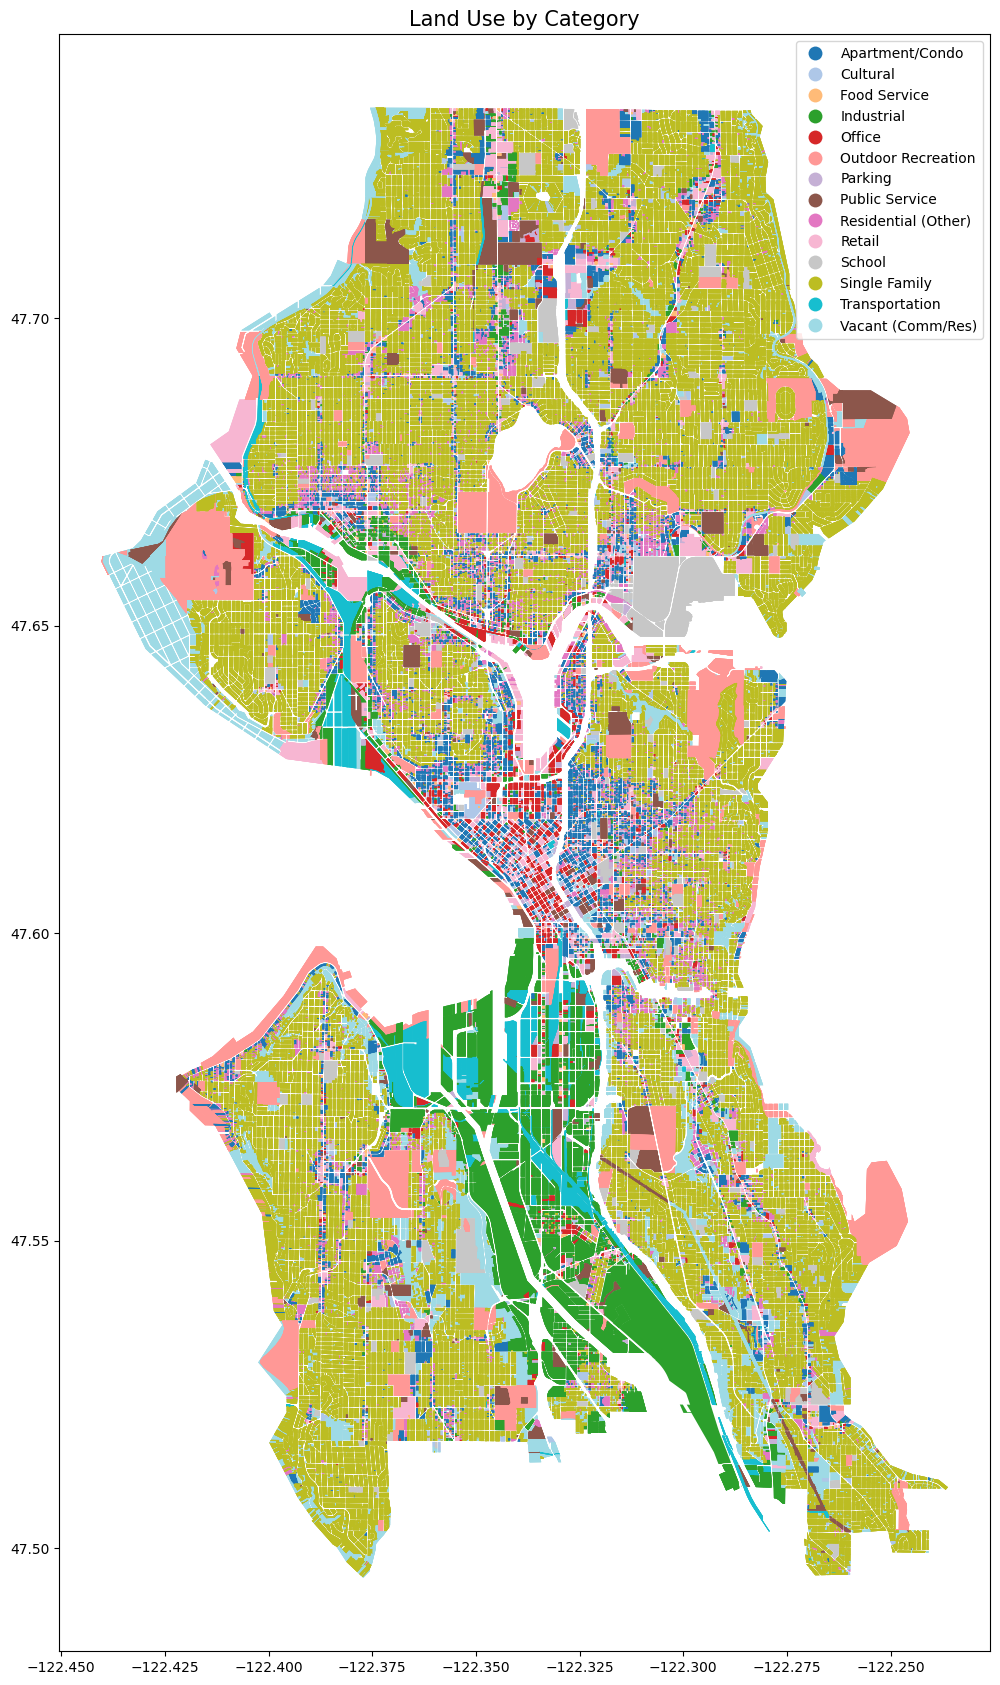

In [129]:
#seattle_frame.plot(column = 'Land_Use_Family', figsize = (20,20), legend = True, cmap = 'tab20')


fig, ax = plt.pyplot.subplots(figsize  = (21, 21))

seattle_frame.plot(column = 'Land_Use_Family',
                                 cmap = 'tab20',
                                 legend = True,
                                 ax = ax)

ax.set_title("Land Use by Category", fontsize=15)


In [18]:
single_family_seattle_frame = seattle_frame[seattle_frame['Land_Use_Family'] == 'Single Family']

In [170]:
single_family_seattle_frame.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 529117 entries, 0 to 2484423
Data columns (total 86 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   OBJECTID               529117 non-null  int64   
 1   MAJOR                  529117 non-null  object  
 2   MINOR                  529117 non-null  object  
 3   PIN                    529117 non-null  object  
 4   COMMENTS               30549 non-null   object  
 5   SITETYPE               528321 non-null  object  
 6   SITEID                 528321 non-null  object  
 7   ADDR_HN                528321 non-null  object  
 8   ADDR_PD                168520 non-null  object  
 9   ADDR_PT                0 non-null       object  
 10  ADDR_SN                528321 non-null  object  
 11  ADDR_ST                527637 non-null  object  
 12  ADDR_SD                345858 non-null  object  
 13  ADDR_NUM               528321 non-null  float64 
 14  ADDR_FULL  

Text(0.5, 1.0, 'Property Tax paid on Single Family Homes, Log Scale')

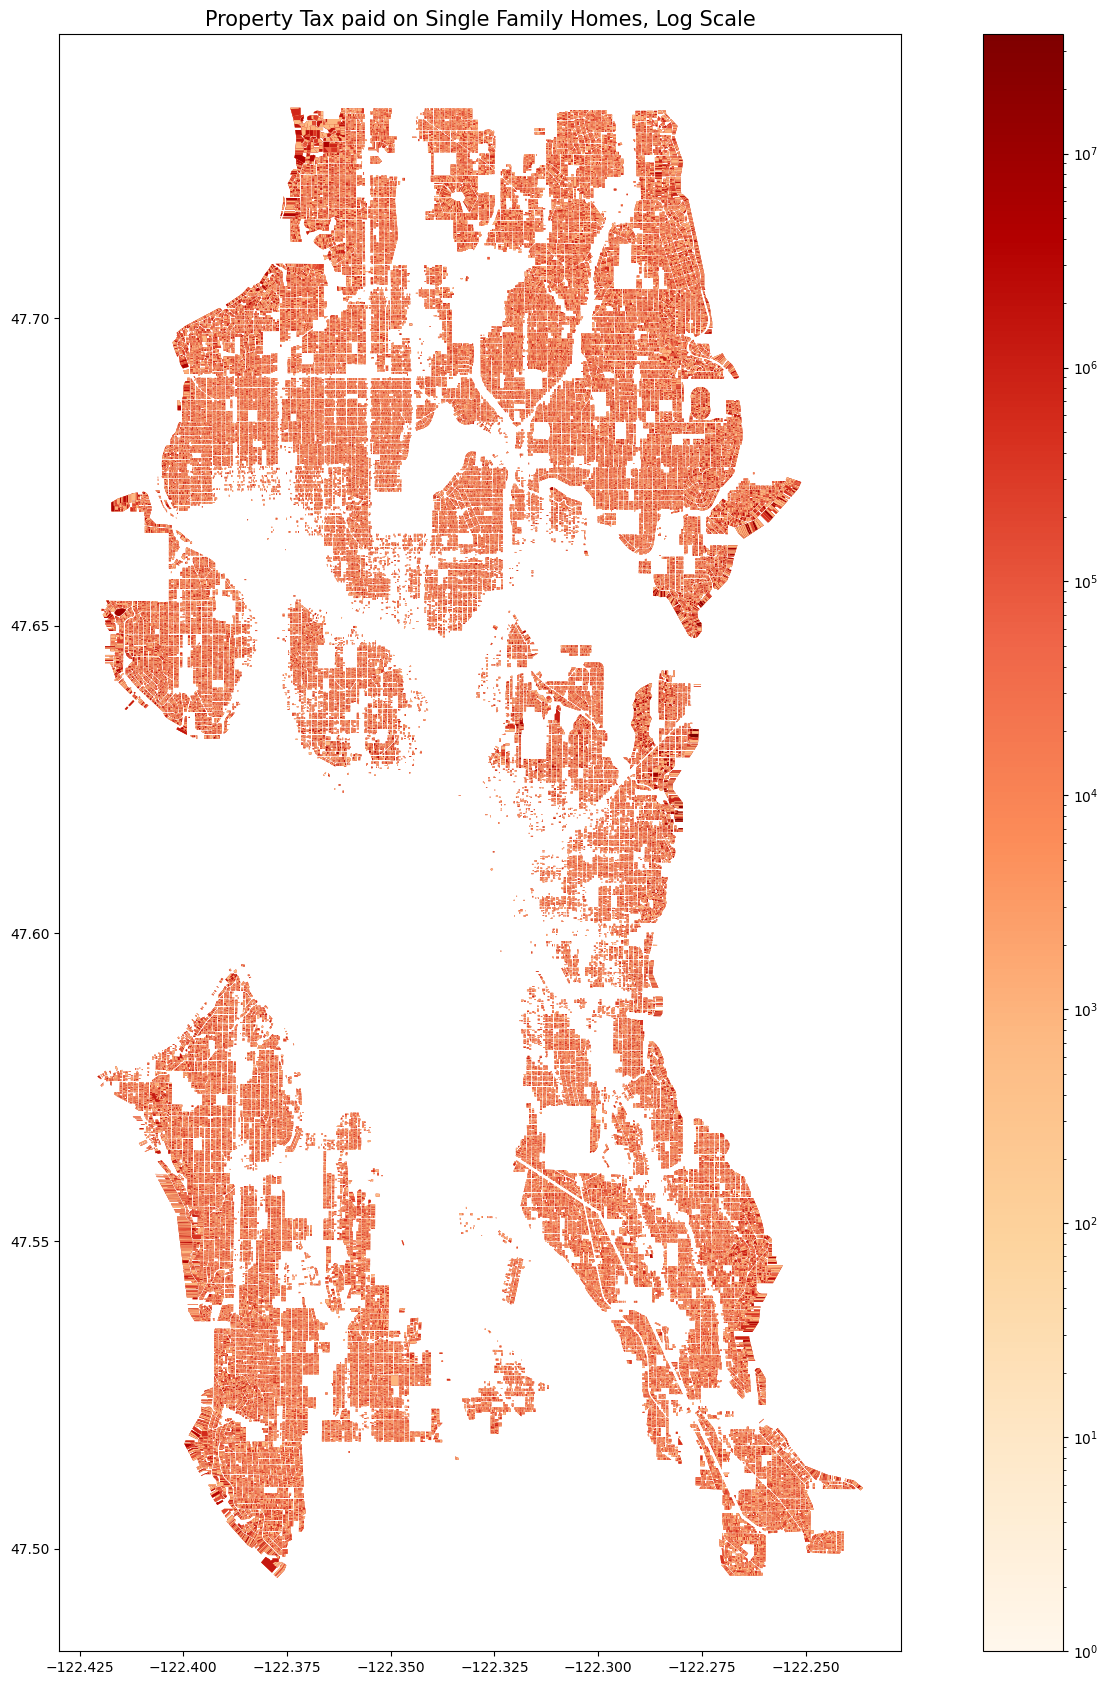

In [127]:
max = single_family_seattle_frame['Paid_Amount'].max().astype(float)

fig, ax = plt.pyplot.subplots(figsize  = (21, 21))

single_family_seattle_frame.plot(column = 'Paid_Amount',
                                 norm=plt.colors.LogNorm(vmin = 1.0, vmax = max),
                                 cmap = 'OrRd',
                                 legend = True,
                                 ax = ax)

ax.set_title("Property Tax paid on Single Family Homes, Log Scale", fontsize=15)

In [20]:
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Food Service']['Paid_Amount'].sum(), ' - Food Service Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Single Family']['Paid_Amount'].sum(), ' - Single Family Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Apartment/Condo']['Paid_Amount'].sum(), ' - Apartment/Condo Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Cultural']['Paid_Amount'].sum(), ' - Cultural Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Industrial']['Paid_Amount'].sum(), ' - Industrial Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Office']['Paid_Amount'].sum(), ' - Office Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Parking']['Paid_Amount'].sum(), ' - Parking Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Residential (Other)']['Paid_Amount'].sum(), ' - Residential (Other) Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Retail']['Paid_Amount'].sum(), ' - Retail Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'School']['Paid_Amount'].sum(), ' - School Total')
print (seattle_frame[seattle_frame['Land_Use_Family'] == 'Vacant']['Paid_Amount'].sum(), ' - Vacant Total')





1041966877  - Food Service Total
118361637145  - Single Family Total
33941556122  - Apartment/Condo Total
1057854048  - Cultural Total
9536847644  - Industrial Total
26479080699  - Office Total
2270071577  - Parking Total
21157977367  - Residential (Other) Total
11293891111  - Retail Total
645797213  - School Total
0  - Vacant Total


In [21]:
seattle_frame['KCTP_TAXYR'].value_counts()

2023.0    750540
Name: KCTP_TAXYR, dtype: int64

In [30]:

###Getting rid of all (approx 60) entries with LOTSQFT = 0
seattle_frame = seattle_frame.drop(seattle_frame[seattle_frame['LOTSQFT'] == 0].index)


In [2]:
seattle_frame['LOTSQFT'].min()

NameError: name 'seattle_frame' is not defined

In [31]:
seattle_frame['Tax_Income_Per_SQFT'] = seattle_frame['Paid_Amount'] / seattle_frame['LOTSQFT']

print(seattle_frame['LOTSQFT'][200])
print(seattle_frame['Paid_Amount'][200])
print(seattle_frame['Tax_Income_Per_SQFT'][200])



9619.0
1247
0.1296392556398794


Text(0.5, 1.0, 'Seattle Tax Income per Square Foot by Parcel, Log Scale')

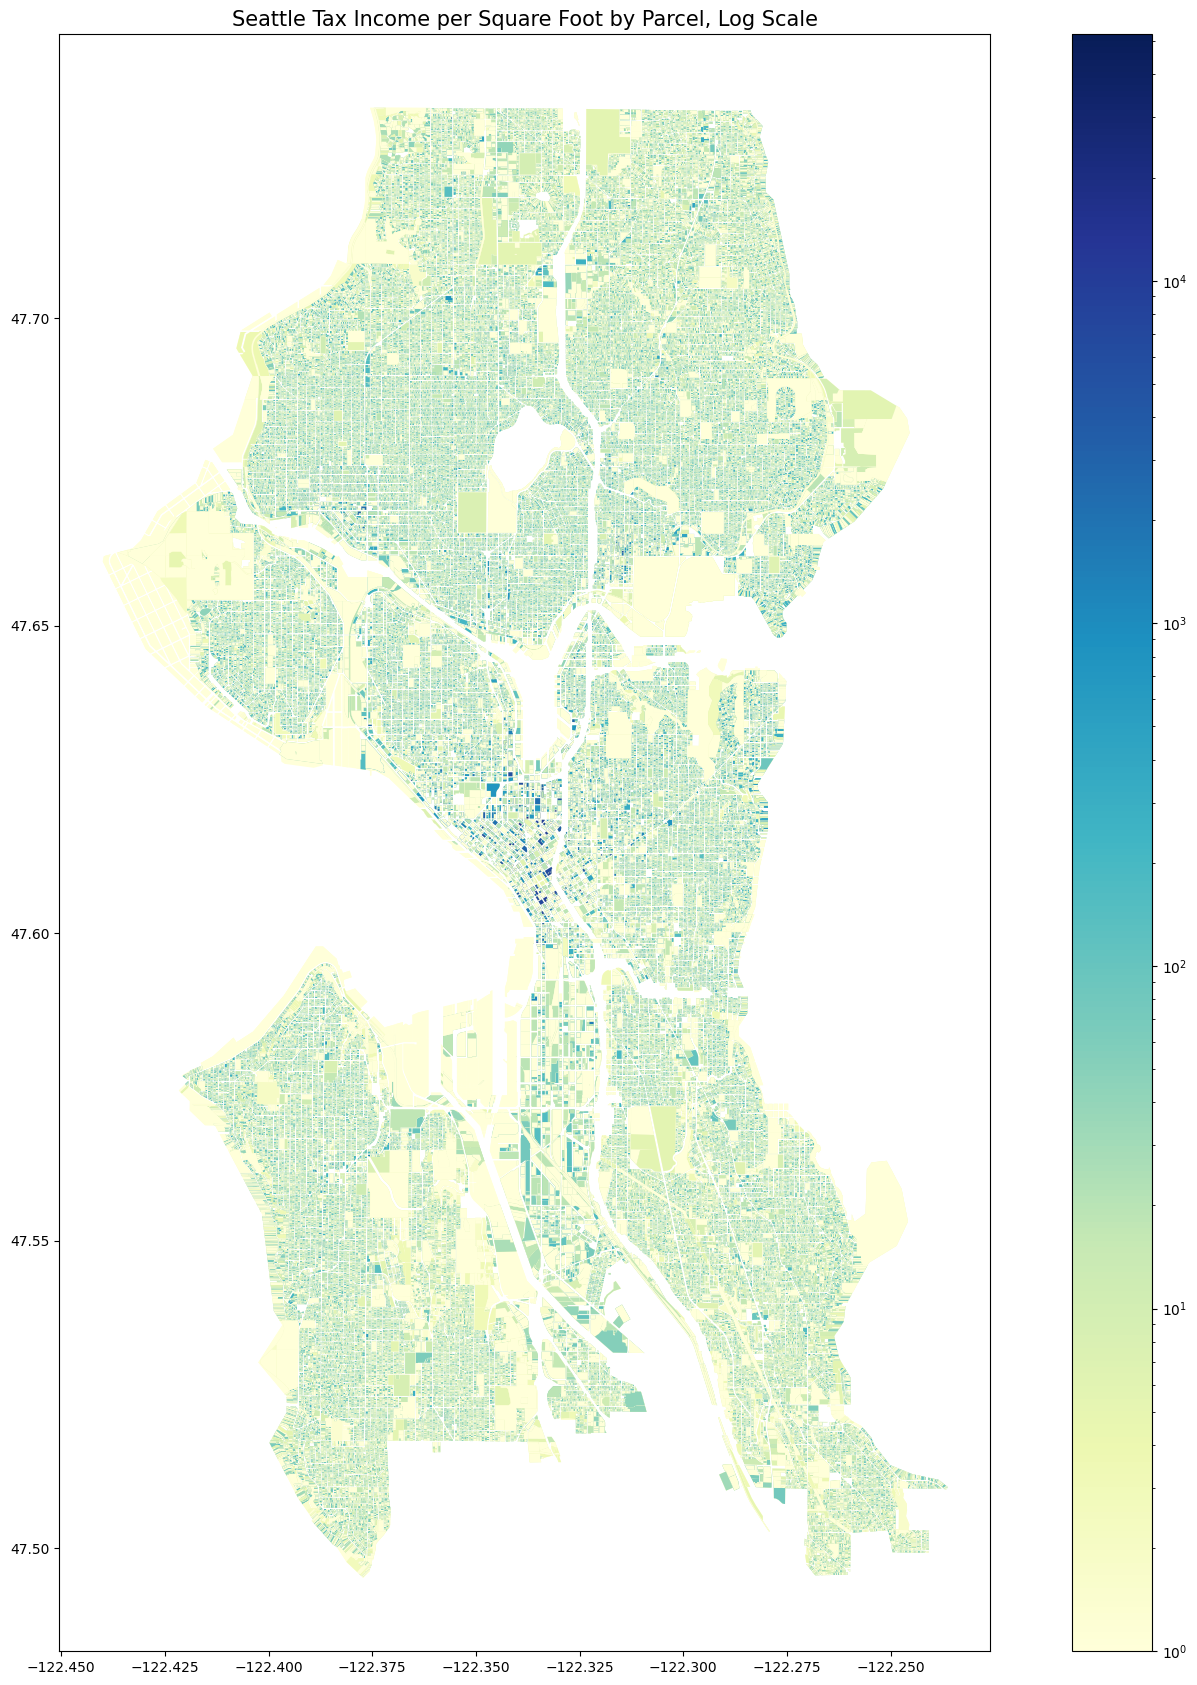

In [132]:
min = seattle_frame['Tax_Income_Per_SQFT'].min()
max = seattle_frame['Tax_Income_Per_SQFT'].max()


fig, ax = plt.pyplot.subplots(figsize  = (21, 21))

seattle_frame.plot(column = 'Tax_Income_Per_SQFT',
                                 norm=plt.colors.LogNorm(vmin = 1.0, vmax = max),
                                 cmap = 'YlGnBu',
                                 legend = True,
                                 ax = ax)

ax.set_title("Seattle Tax Income per Square Foot by Parcel, Log Scale", fontsize=15)




#fig, ax = plt.pyplot.subplots(figsize  = (12, 8))

#seattle_frame.plot(column = 'Tax_Income_Per_SQFT', figsize = (20,20), legend = True, norm=plt.colors.LogNorm(vmin = 1.0, vmax = max), cmap = 'YlGnBu')

#ax.set_title('Seattle Tax Income per Square Foot by Parcel')

In [159]:
#average_tax_income_by_category = seattle_frame.groupby(['PREUSE_DES']).agg({'Paid_Amount':{'sum', 'mean'}, 'OBJECTID':'count'}).reset_index()
average_tax_income_by_category = seattle_frame.groupby(['PREUSE_DES']).agg(
    Mean_Tax_Income=('Paid_Amount', np.mean),
    Total_Tax_Income=('Paid_Amount', np.sum),
    Mean_Size_By_Cat=('LOTSQFT', np.mean),
    Total_Size_By_Cat=('LOTSQFT', np.sum),
    Total_Parcels_In_Cat=('OBJECTID', np.size))


pd.options.display.float_format = '{:.000f}'.format ##disable scientific notation
pd.set_option('display.max_rows', None)
average_tax_income_by_category['Mean_Income_Per_SQFT'] = average_tax_income_by_category['Total_Tax_Income'] / average_tax_income_by_category['Total_Size_By_Cat']
average_tax_income_by_category.sort_values('Mean_Income_Per_SQFT', inplace = True, ascending = False)

average_tax_income_by_category.reset_index(inplace = True)

#for col in average_tax_income_by_category.columns:
    #print(col)
average_tax_income_by_category.rename(columns={"PREUSE_DES": "Property Type"}, inplace = True)

#average_tax_income_by_category['Total_Size_By_Cat']




#for col in average_tax_income_by_category.columns:
    #print(col)

average_tax_income_by_category

Property Type  Mean_Tax_Income  Total_Tax_Income  \
0             Historic Prop(Office)          5791619         648661329   
1          Historic Prop(Eat/Drink)          3958618          15834473   
2                       Hotel/Motel          6980964        3986130454   
3               High Tech/High Flex          6516954          78203444   
4                   Office Building          4477368       25198625770   
5              Apartment(Mixed Use)          2575676       12072191262   
6               Condominium(Office)          3173909         187260634   
7                  Apartment(Co-op)          1298956         181853821   
8             Historic Prop(Retail)          2090489          98252990   
9                    Townhouse Plat           147025       13477817942   
10         Skating Rink(Ice/Roller)         19787299          79149195   
11                        Apartment          1082857       19506578199   
12                    Bowling Alley          1201816          14421788   
13          Parking(Commercial Lot)           826262         906409703   
14              Retirement Facility          2471215         862453962   
15            Medical/Dental Office          1283403        1074208208   
16                  Parking(Garage)          2165562         606357293   
17        Fraternity/Sorority House           806516         174207363   
18                    Rooming House           308949         224297240   
19                  Bed & Breakfast           403340           4840086   
20           Single Family(C/I Use)           178786         128547324   
21           Condominium(Mixed Use)          1202283        1251576670   
22                    Tavern/Lounge           336025          86358323   
23                   Mini Warehouse          2826659         497492071   
24                     Retail Store           548881        2879980162   
25                Restaurant/Lounge           471777         760976561   
26                             Bank           960189         376393974   
27                    Grocery Store          1909352         458244451   
28          Shopping Ctr(Community)         12180665         438503933   
29         Shopping Ctr(Maj Retail)          8614588         275666804   
30              Historic Prop(Misc)           679543          17668130   
31                          Triplex           257972        1459863067   
32               Retail(Line/Strip)           752106         475331202   
33                        Mini Lube           559694          17910195   
34                           4-Plex           265998         984992315   
35      Historic Prop(Loft/Warehse)           692297           5538377   
36            Auto Showroom and Lot          1414459         355029153   
37          Single Family(C/I Zone)           186369        1066217562   
38     Utility, Private(Radio/T.V.)          1118563          71588020   
39                           Duplex           213479        3470097399   
40              Conv Store with Gas           670856         269013089   
41                         Car Wash           769668          43101396   
42          Vet/Animal Control Srvc           422847          49050250   
43          Shopping Ctr(Nghbrhood)          4367010         353727828   
44                  Shell Structure           314554          44037585   
45                  Service Station           431822          53545981   
46      Single Family(Res Use/Zone)           224167      117166872259   
47         Historic Prop(Residence)           309201          16696837   
48           Shopping Ctr(Regional)          9041911          36167645   
49            Restaurant(Fast Food)           454748         194631993   
50                  Retail(Big Box)          3915902         203626906   
51                   Daycare Center           347781          55992699   
52                      Gas Station           465880           3727044   
53                        

In [164]:
def style_table(styler):
    styler.set_caption("Seattle Property Categories with Tax and Size Information")
    styler.hide(axis='index')
    styler.background_gradient(axis=None, vmin=1, vmax=3958618, cmap="YlGnBu", subset='Mean_Tax_Income')
    styler.background_gradient(axis=None, vmin=1, vmax=25198625770, cmap="YlGnBu", subset='Total_Tax_Income')
    styler.background_gradient(axis=None, vmin=1, vmax=257194, cmap="YlGnBu", subset='Mean_Size_By_Cat')
    styler.background_gradient(axis=None, vmin=1, vmax=204346797, cmap="YlGnBu", subset='Total_Size_By_Cat')
    styler.background_gradient(axis=None, vmin=1, vmax=6562, cmap="YlGnBu", subset='Total_Parcels_In_Cat')
    styler.background_gradient(axis=None, vmin=1, vmax=421, cmap="YlGnBu", subset='Mean_Income_Per_SQFT')
    return styler

In [165]:
average_tax_income_by_category.style.pipe(style_table)

In [1]:
#import tabulate
average_tax_income_by_category.to

ModuleNotFoundError: No module named 'tabulate'